# Explorartory Methods for Text Data


In [99]:
%matplotlib inline
# General imports
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load the Books included in the basic NLTK Package
from nltk.book import *

### Searching Text

#### 1. Looking at words in their natural context using 'concordance'

In [23]:
# Searching trough Text
text1.concordance('monstrous', lines=3)

Displaying 3 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick


In [22]:
text1.concordance('most', lines=3)

Displaying 3 of 282 matches:
RALS . " The Indian Sea breedeth the most and the biggest fishes that are : am
ed . Among the former , one was of a most monstrous size . ... This came towar
late years , must have possessed the most abundant and the most convenient opp


#### 2. Highlighting the meaning of words based on common 'coocurrences'

In [35]:
# Subsetting where two words share the same context
text2.common_contexts(['monstrous', 'very'])

a_pretty am_glad a_lucky is_pretty be_glad


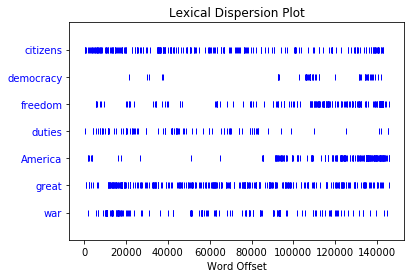

In [40]:
# Finding positions within the Text a word appears
text4.dispersion_plot(['citizens', 'democracy','freedom', 'duties', 'America', 'great', 'war' ])

## 2. Using frequency to learn about Text

In [69]:
def lexical_diversity(text):
    """
    Calculate a measure of the diversity of words used in a given text.
    """
    return len(text)/len(set(text))

def percentage(count, total):
    return count/total * 100

def word_frequency(word, text):
    freq = percentage(text4.count(word), len(text))
    print('The word \'%s\' appears %.3f times in the \'%s\''%(word, freq, text.name))

In [56]:
# Compare Texts based on their frequency measures
pd.DataFrame([lexical_diversity(text) for text in [text1, text2, text3, text4]], columns=['Diversity'])

,Diversity
0,13.502045
1,20.719450
2,16.050197
3,14.941050


In [70]:
# Percentage based measures for tokens
word_frequency('a', text4)

The word 'a' appears 1.464 times in the 'Inaugural Address Corpus'


In [74]:
for word in text4.tokens[:10]:
    word_frequency(word, text4)

The word 'Fellow' appears 0.016 times in the 'Inaugural Address Corpus'
The word '-' appears 0.192 times in the 'Inaugural Address Corpus'
The word 'Citizens' appears 0.005 times in the 'Inaugural Address Corpus'
The word 'of' appears 4.783 times in the 'Inaugural Address Corpus'
The word 'the' appears 6.368 times in the 'Inaugural Address Corpus'
The word 'Senate' appears 0.008 times in the 'Inaugural Address Corpus'
The word 'and' appears 3.425 times in the 'Inaugural Address Corpus'
The word 'of' appears 4.783 times in the 'Inaugural Address Corpus'
The word 'the' appears 6.368 times in the 'Inaugural Address Corpus'
The word 'House' appears 0.005 times in the 'Inaugural Address Corpus'


In [84]:
# Creating a Frequeny Distribution on the Count of Terms
fdist1 = FreqDist(text1)
print(fdist1)

<FreqDist with 19317 samples and 260819 outcomes>


In [92]:
# Extracting the Dictionary of Terms in the Text
vocab1 = fdist1.keys()
vocab1

dict_keys(['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.', '(', 'Supplied', 'a', 'Late', 'Consumptive', 'Usher', 'to', 'Grammar', 'School', ')', 'The', 'pale', '--', 'threadbare', 'in', 'coat', ',', 'heart', 'body', 'and', 'brain', ';', 'I', 'see', 'him', 'now', 'He', 'was', 'ever', 'dusting', 'his', 'old', 'lexicons', 'grammars', 'with', 'queer', 'handkerchief', 'mockingly', 'embellished', 'all', 'the', 'gay', 'flags', 'of', 'known', 'nations', 'world', 'loved', 'dust', 'it', 'somehow', 'mildly', 'reminded', 'mortality', '"', 'While', 'you', 'take', 'hand', 'school', 'others', 'teach', 'them', 'what', 'name', 'whale', '-', 'fish', 'is', 'be', 'called', 'our', 'tongue', 'leaving', 'out', 'through', 'ignorance', 'letter', 'H', 'which', 'almost', 'alone', 'maketh', 'signification', 'word', 'deliver', 'that', 'not', 'true', '."', 'HACKLUYT', 'WHALE', '...', 'Sw', 'Dan', 'HVAL', 'This', 'animal', 'named', 'from', 'roundness', 'or', 'rolling', 'for', 'HVALT',

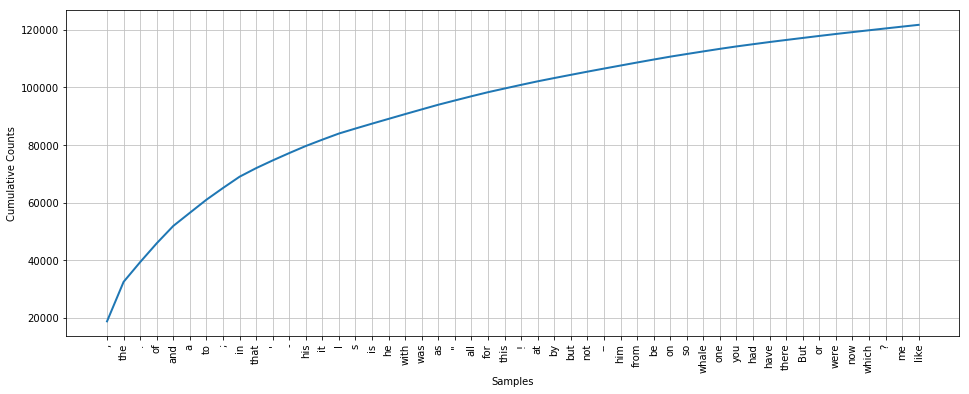

In [138]:
plt.figure(figsize=[16,6])
fdist1.plot(50, cumulative=True)

In [115]:
fdist5 = FreqDist(text5)

# Creating fine grained Frequency Counts
sorted([w for w in set(text5) if len(w) > 7 and fdist5[w] > 7])[:15]

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously']

In [133]:
# Counting single word occurences
fdist5['Question']

8

In [134]:
# Counting the total Number of tokens
fdist5.N()

45010

### Collocations and n-Grams

In [127]:
from nltk import bigrams

# This creates an iterator object
bigrams(text5)

<generator object bigrams at 0x0000029C504EBA98>

In [129]:
# We can easily cast it to a list
list(bigrams(text5))[:10]

[('now', 'im'),
 ('im', 'left'),
 ('left', 'with'),
 ('with', 'this'),
 ('this', 'gay'),
 ('gay', 'name'),
 ('name', ':P'),
 (':P', 'PART'),
 ('PART', 'hey'),
 ('hey', 'everyone')]

In [131]:
# We can identify two words that occur together unusually often using 'collocations'
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


In [132]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build
